<a href="https://colab.research.google.com/github/viviansharp/Nawiri_Sprint/blob/main/Project_Nairitech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Survival analysis of heart fialure patients : An Exploratory Analysis**

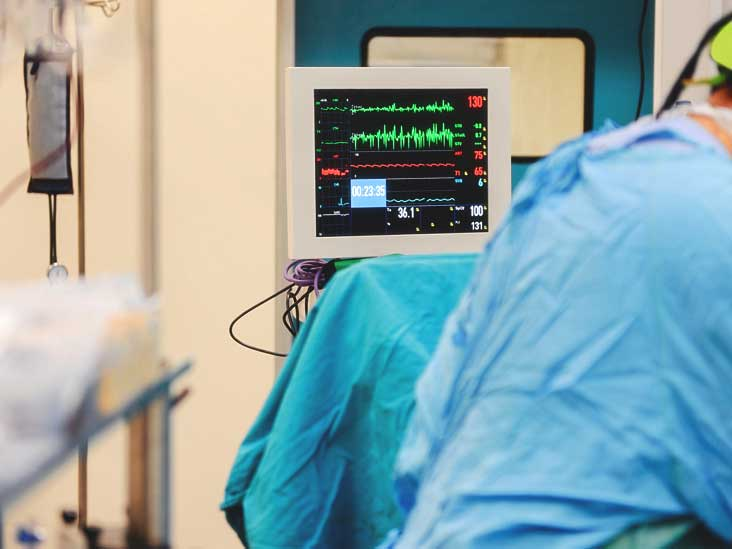

**INTRODUCTION**
Cardiovascular diseases kill approximately 17 million people globally every year, and they mainly exhibit as myocardial infarctions and heart failures. Heart failure (HF) occurs when the heart cannot pump enough blood to meet the needs of the body

Dataset : This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.

Source: UCI Machine Learning Repository

**Research Questions**

Q1.	What is the relationship between age and the incidence of 
	heart failure in the studied population?

Q2.	How do different comorbidities such as hypertension, diabetes, and
	 smoking status affect the prognosis of heart failure patients?

Q3. How does gender influence the incidences of heart failure in the 
	studied population?

Q4.	How do changes in the levels of biomarkers such as CPK, creatinine,
	 And sodium affect the incidence of heart failure in patients?

Q5.	What are the significant risk factors for survival?




Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

Import Dataset


In [ ]:
df = pd.read_csv('heart_dataset.csv')

In [ ]:
#lets get to understand our dataset
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

DATA CLEANING QUALITY AND TIDYNESS

From the information above,here are my observations:

*   We have 299 data/entries
*   13 Variables
*   No missing values







In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Variables description
- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target variable] death event: if the patient deceased during the follow-up period (boolean)

# EXPLORATORY DATA ANAYLSIS

We need to explore each variables in relation with the target variable to understand if it is a significant risk factor

### **AGE**

In [ ]:
#age is in float so we change it to integer
df['age'] = df['age'].astype(int)
df.to_csv('updated_dataset.csv', index=False)


In [ ]:
df['age']

0      75
1      55
2      65
3      50
4      65
       ..
294    62
295    55
296    45
297    45
298    50
Name: age, Length: 299, dtype: int64

In [ ]:
#descriptive statitics
df['age'].describe()

count    299.000000
mean      60.829431
std       11.894997
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

Based on the descriptive statistics: 

**Highest age is 95**

**Smallest age is 40**

**Average age is 60**

**Lets visualize this!**

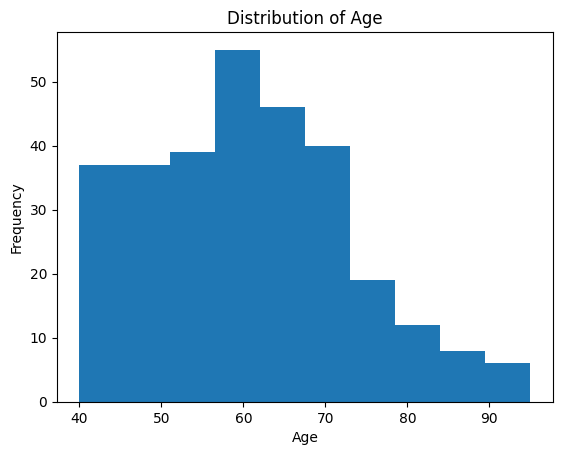

In [ ]:

# plot a histogram of the age variable
plt.hist(df['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

#we can use boxplot or desnsity plot too
# plot a box plot of the age variable
#plt.boxplot(df['age'])
#plt.ylabel('Age')
#plt.title('Distribution of Age')
#plt.show()

# plot a density plot of the age variable
#df['age'].plot(kind='density')
#plt.xlabel('Age')
#plt.title('Distribution of Age')
#plt.show()


In [ ]:
#lets see how age affects our target variable
#target variable is death_event
#lets see the count of  event
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

This means we have 203 who survived and 96 people who died

0 - survive

1-   didnt survive

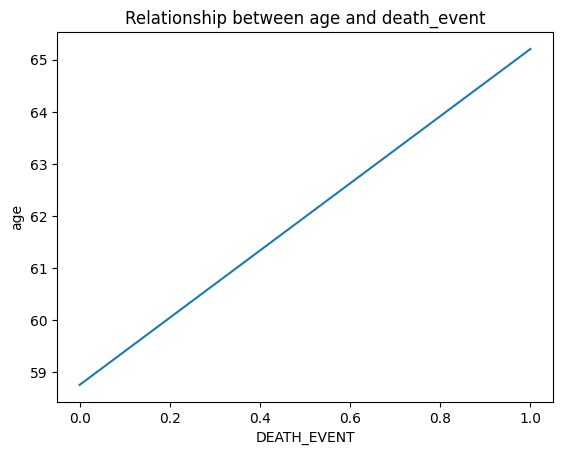

In [ ]:
#which age is at risk of death
df.groupby('DEATH_EVENT')['age'].mean().plot(kind='line')
plt.xlabel('DEATH_EVENT')
plt.ylabel('age')
plt.title('Relationship between age and death_event')
plt.show()

In [ ]:
def stacked_bar_chart(column):
    # Get the count of records by column and death_event    
    df_pct = df.groupby([column, 'DEATH_EVENT'])['age'].count()
    # Create proper DataFrame's format
    df_pct = df_pct.unstack()    
    return df_pct.plot.bar(stacked=True, figsize=(6,6), width=1);

<Axes: xlabel='age'>

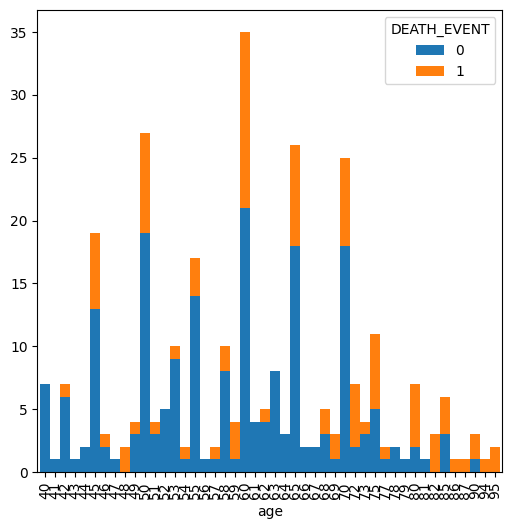

In [ ]:
stacked_bar_chart("age")

In [ ]:
from scipy.stats import pearsonr
pearsonr(df['DEATH_EVENT'], df['age'])

PearsonRResult(statistic=0.2537285430880036, pvalue=8.916762946532939e-06)

This shows risk of death increases with Age

# COMORBIDITIES VS SURVIVAL

How do different comorbidities such as hypertension, diabetes, and smoking status affect the incidence of heart failure patients?


In [ ]:
#smoking
df['smoking'].value_counts()

0    203
1     96
Name: smoking, dtype: int64

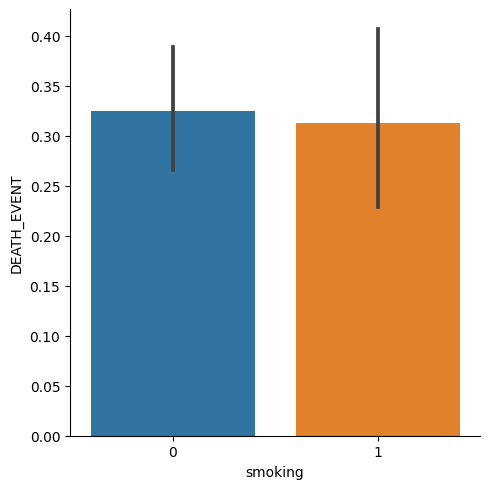

In [ ]:
sns.catplot(data=df, x="smoking", y="DEATH_EVENT", kind="bar")

<Axes: xlabel='smoking'>

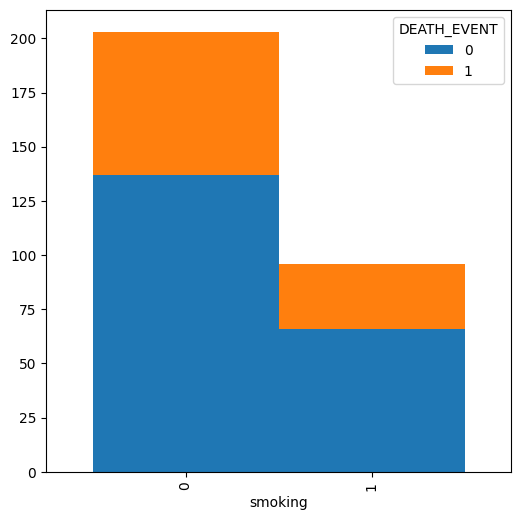

In [ ]:
stacked_bar_chart('smoking')

In [ ]:
from scipy.stats import pearsonr
pearsonr(df['DEATH_EVENT'], df['smoking'])

PearsonRResult(statistic=-0.012623152709359646, pvalue=0.82792071280924)

From the result above , smoking surprisingly doesnt affect the incidence of having a heart failure

In [ ]:
#Hypertension
df['high_blood_pressure'].describe()


count    299.000000
mean       0.351171
std        0.478136
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: high_blood_pressure, dtype: float64

In [ ]:
df['high_blood_pressure'].value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

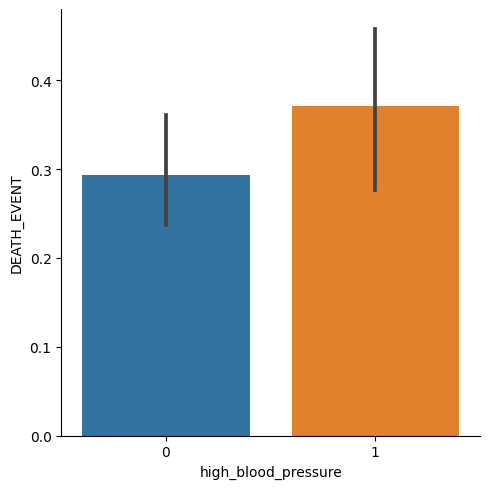

In [ ]:
sns.catplot(data=df, x="high_blood_pressure", y="DEATH_EVENT", kind="bar")

<Axes: xlabel='high_blood_pressure'>

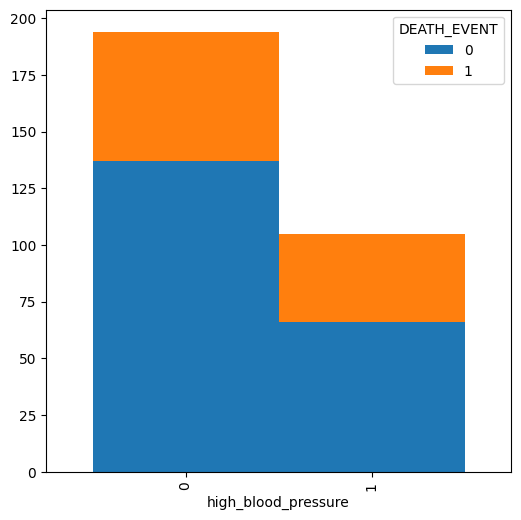

In [ ]:
stacked_bar_chart('high_blood_pressure')

In [ ]:
from scipy.stats import pearsonr
pearsonr(df['DEATH_EVENT'], df['high_blood_pressure'])

PearsonRResult(statistic=0.07935105769128536, pvalue=0.17114949852935257)

From the vizualization, high bp is not significant to heart failure incidence

In [ ]:
#diabetes
df['diabetes'].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

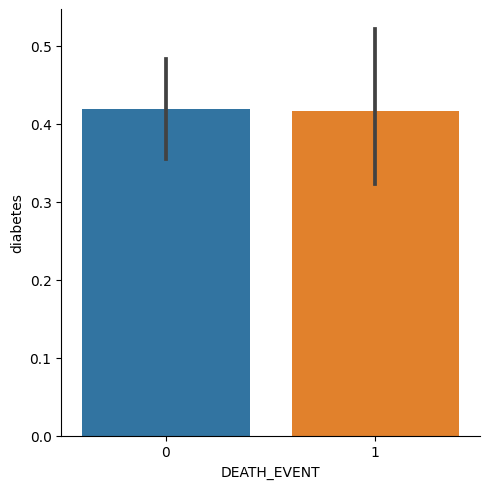

In [ ]:
sns.catplot(data=df,x='DEATH_EVENT',y ="diabetes",kind ='bar')

<Axes: xlabel='diabetes'>

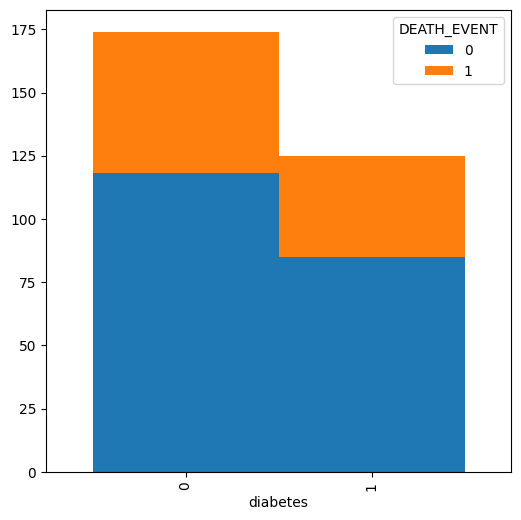

In [ ]:
stacked_bar_chart('diabetes')

In [ ]:
from scipy.stats import pearsonr
pearsonr(df['DEATH_EVENT'], df['diabetes'])

PearsonRResult(statistic=-0.0019428833442034722, pvalue=0.9733118267847665)

Diabetes surprisingly has no influence on the incidence of heart failure

# **SEX**

In [ ]:
#Lets check the sex count
x =df['sex'].value_counts()
x

1    194
0    105
Name: sex, dtype: int64

There are

105 women(0-

194 men(1)

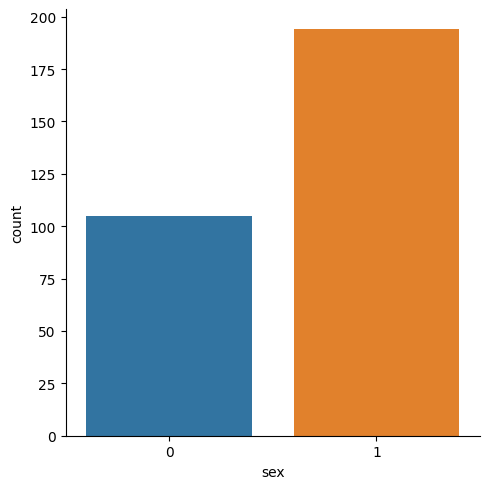

In [ ]:
sns.catplot(data=df, x="sex", kind="count")






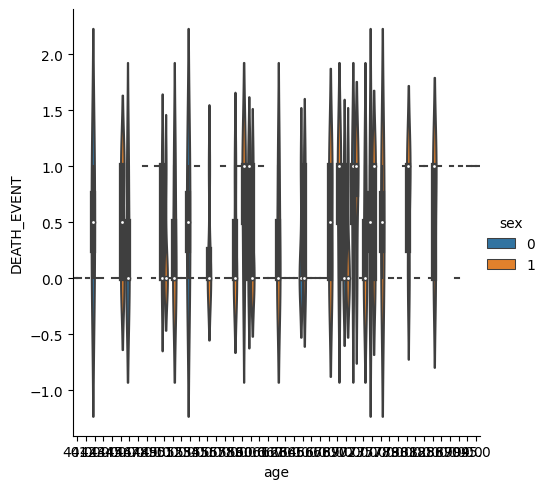

In [ ]:
sns.catplot(
    data=df, x="age", y="DEATH_EVENT", hue="sex", kind="violin",
)

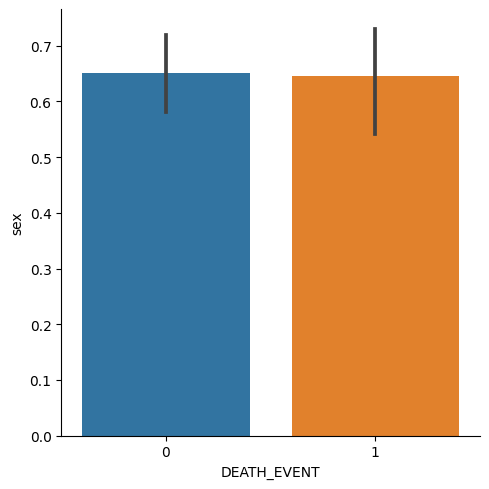

In [ ]:
#lets see if there is significant risk based on gender
sns.catplot(data=df, x="DEATH_EVENT", y="sex", kind="bar")

<Axes: xlabel='sex'>

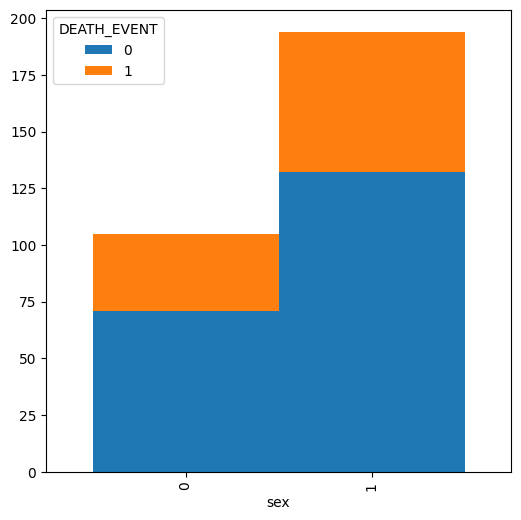

In [ ]:
stacked_bar_chart('sex')

I cant see the relationship of gender being a risk factor

###BIOMARKERS VS SURVIVAL

In [ ]:
#'creatinine_phosphokinase' normal range = 23- 7861 micrograms per liter
df['creatinine_phosphokinase'].describe()

count     299.000000
mean      581.839465
std       970.287881
min        23.000000
25%       116.500000
50%       250.000000
75%       582.000000
max      7861.000000
Name: creatinine_phosphokinase, dtype: float64

<Axes: xlabel='creatinine_phosphokinase'>

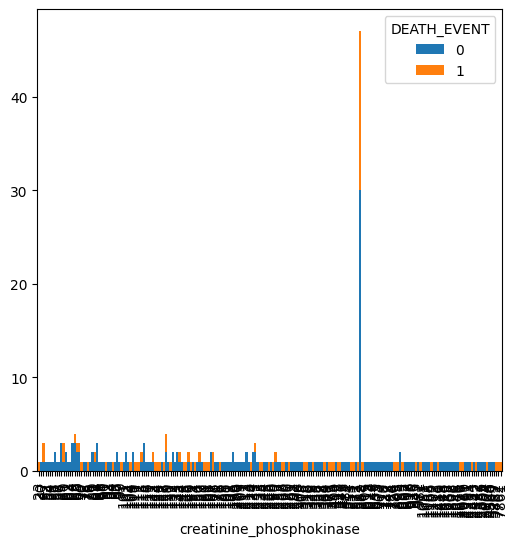

In [ ]:
stacked_bar_chart('creatinine_phosphokinase')

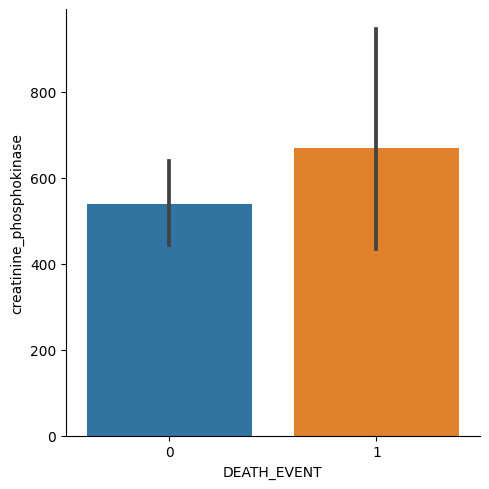

In [ ]:
sns.catplot(data=df, x="DEATH_EVENT", y="creatinine_phosphokinase", kind="bar")

In [ ]:
from scipy.stats import pearsonr
pearsonr(df['DEATH_EVENT'], df['creatinine_phosphokinase'])

PearsonRResult(statistic=0.06272816025237474, pvalue=0.2796112457361396)

CPK is not significant to heart failure incidence


In [ ]:
#ejection fraction
df['ejection_fraction'].describe()

count    299.000000
mean      38.083612
std       11.834841
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64

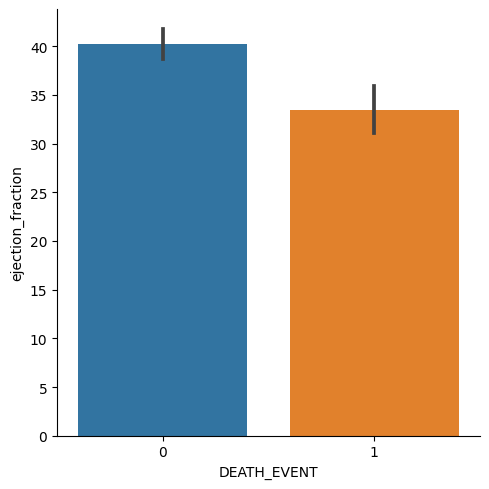

In [ ]:
sns.catplot(data=df, x="DEATH_EVENT", y="ejection_fraction", kind="bar")

<Axes: xlabel='ejection_fraction'>

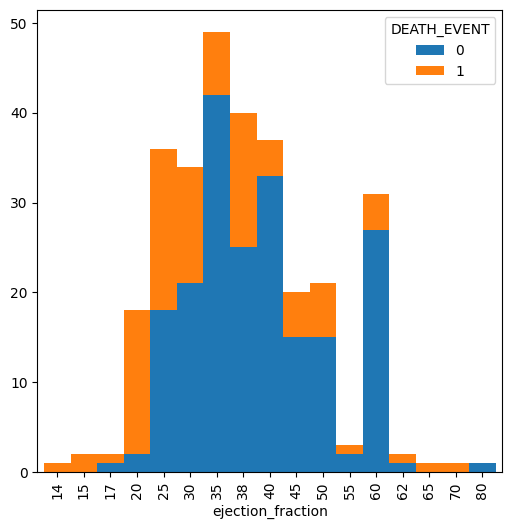

In [ ]:
stacked_bar_chart('ejection_fraction')

In [ ]:
from scipy.stats import pearsonr
pearsonr(df['DEATH_EVENT'], df['ejection_fraction'])

PearsonRResult(statistic=-0.26860331239406215, pvalue=2.4528974182088576e-06)

Ejection fraction lower than 30 % has higher risk of heart failure and this is significantly correlated to death event

In [ ]:
#sodium range is [114-148  milliequivalents per litre]
df['serum_sodium'].describe()

count    299.000000
mean     136.625418
std        4.412477
min      113.000000
25%      134.000000
50%      137.000000
75%      140.000000
max      148.000000
Name: serum_sodium, dtype: float64

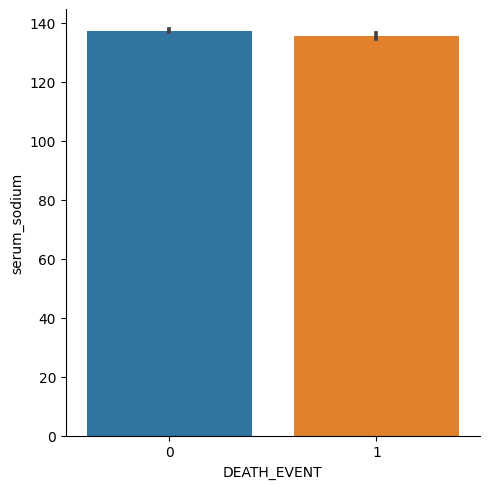

In [ ]:
sns.catplot(data=df, x="DEATH_EVENT", y="serum_sodium", kind="bar")

<Axes: xlabel='serum_sodium'>

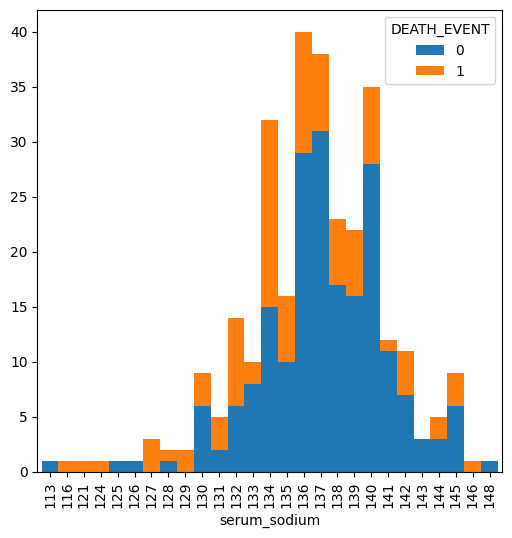

In [ ]:
stacked_bar_chart('serum_sodium')

In [ ]:
from scipy.stats import pearsonr
pearsonr(df['DEATH_EVENT'], df['serum_sodium'])

PearsonRResult(statistic=-0.19520359641640114, pvalue=0.0006889112363763596)

In [ ]:
#serum creatinine - [0.50- 9.40]
df['serum_creatinine'].describe()

count    299.00000
mean       1.39388
std        1.03451
min        0.50000
25%        0.90000
50%        1.10000
75%        1.40000
max        9.40000
Name: serum_creatinine, dtype: float64

<Axes: xlabel='serum_creatinine'>

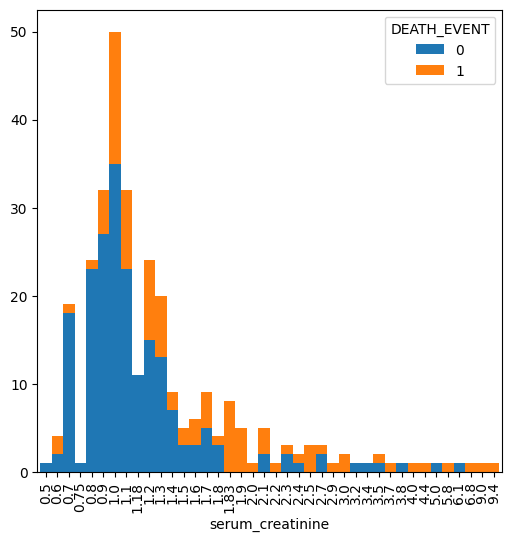

In [ ]:
stacked_bar_chart('serum_creatinine')

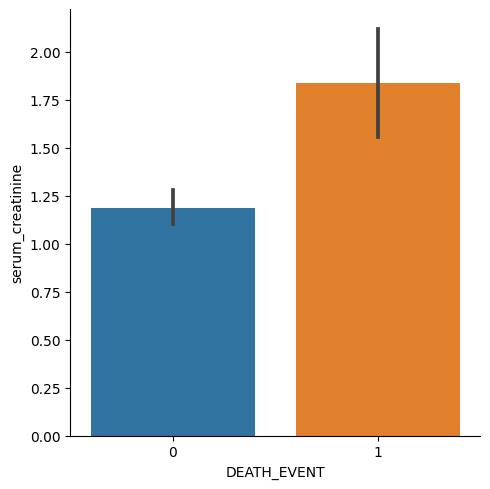

In [ ]:
sns.catplot(data=df, x="DEATH_EVENT", y="serum_creatinine", kind="bar")

In [ ]:
from scipy.stats import pearsonr
pearsonr(df['DEATH_EVENT'], df['serum_creatinine'])

PearsonRResult(statistic=0.2942775609841492, pvalue=2.190197854897928e-07)

Having serum creatinine greater than its normal level 1.5 is renal dysfunction and a risk factor for heart failure


##Other Analysis

Text(0.5, 1.0, 'Correlation Heatmap of significant variables with death_event')

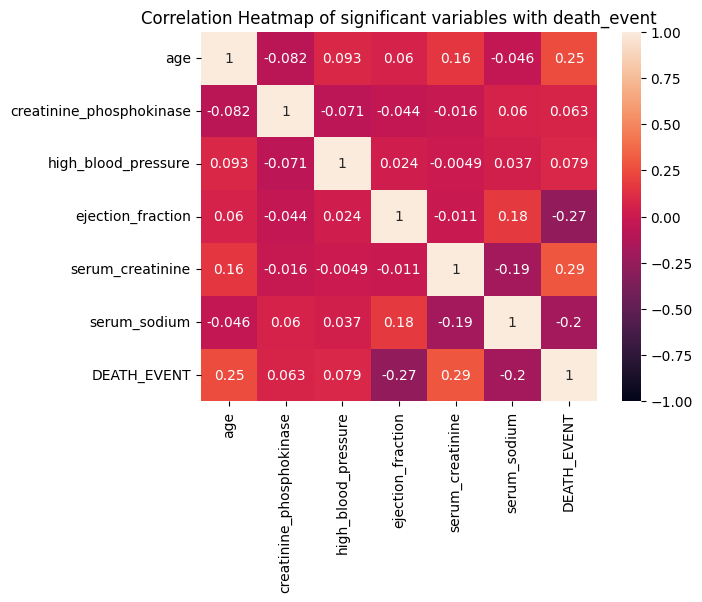

In [ ]:
#lets see the correlation of other variables
# Create the correlation heatmap for numerical variables
heatmap = sns.heatmap(df[['age', 'creatinine_phosphokinase', 'high_blood_pressure', 'ejection_fraction' , 'serum_creatinine', 'serum_sodium', 'DEATH_EVENT']].corr(), vmin=-1, vmax=1, annot=True)
# Create the title
heatmap.set_title('Correlation Heatmap of significant variables with death_event')

In [ ]:
#to have an overview of how the variables correlates with target variable
corr_matrix = df.corr()


<Axes: >

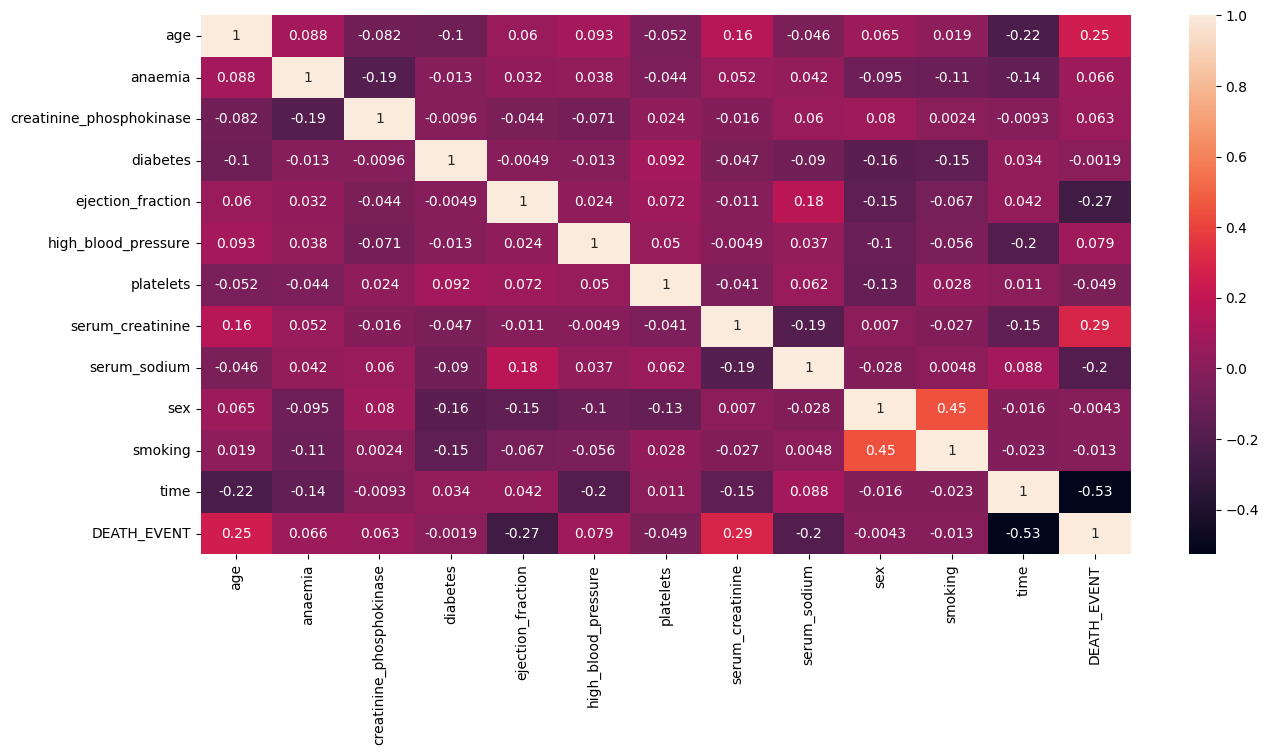

In [ ]:
plt.subplots(figsize=(15, 7))
sns.heatmap(corr_matrix, annot=True)

In [ ]:
pairplot_figure = sns.pairplot(df, hue="DEATH_EVENT", height=6)

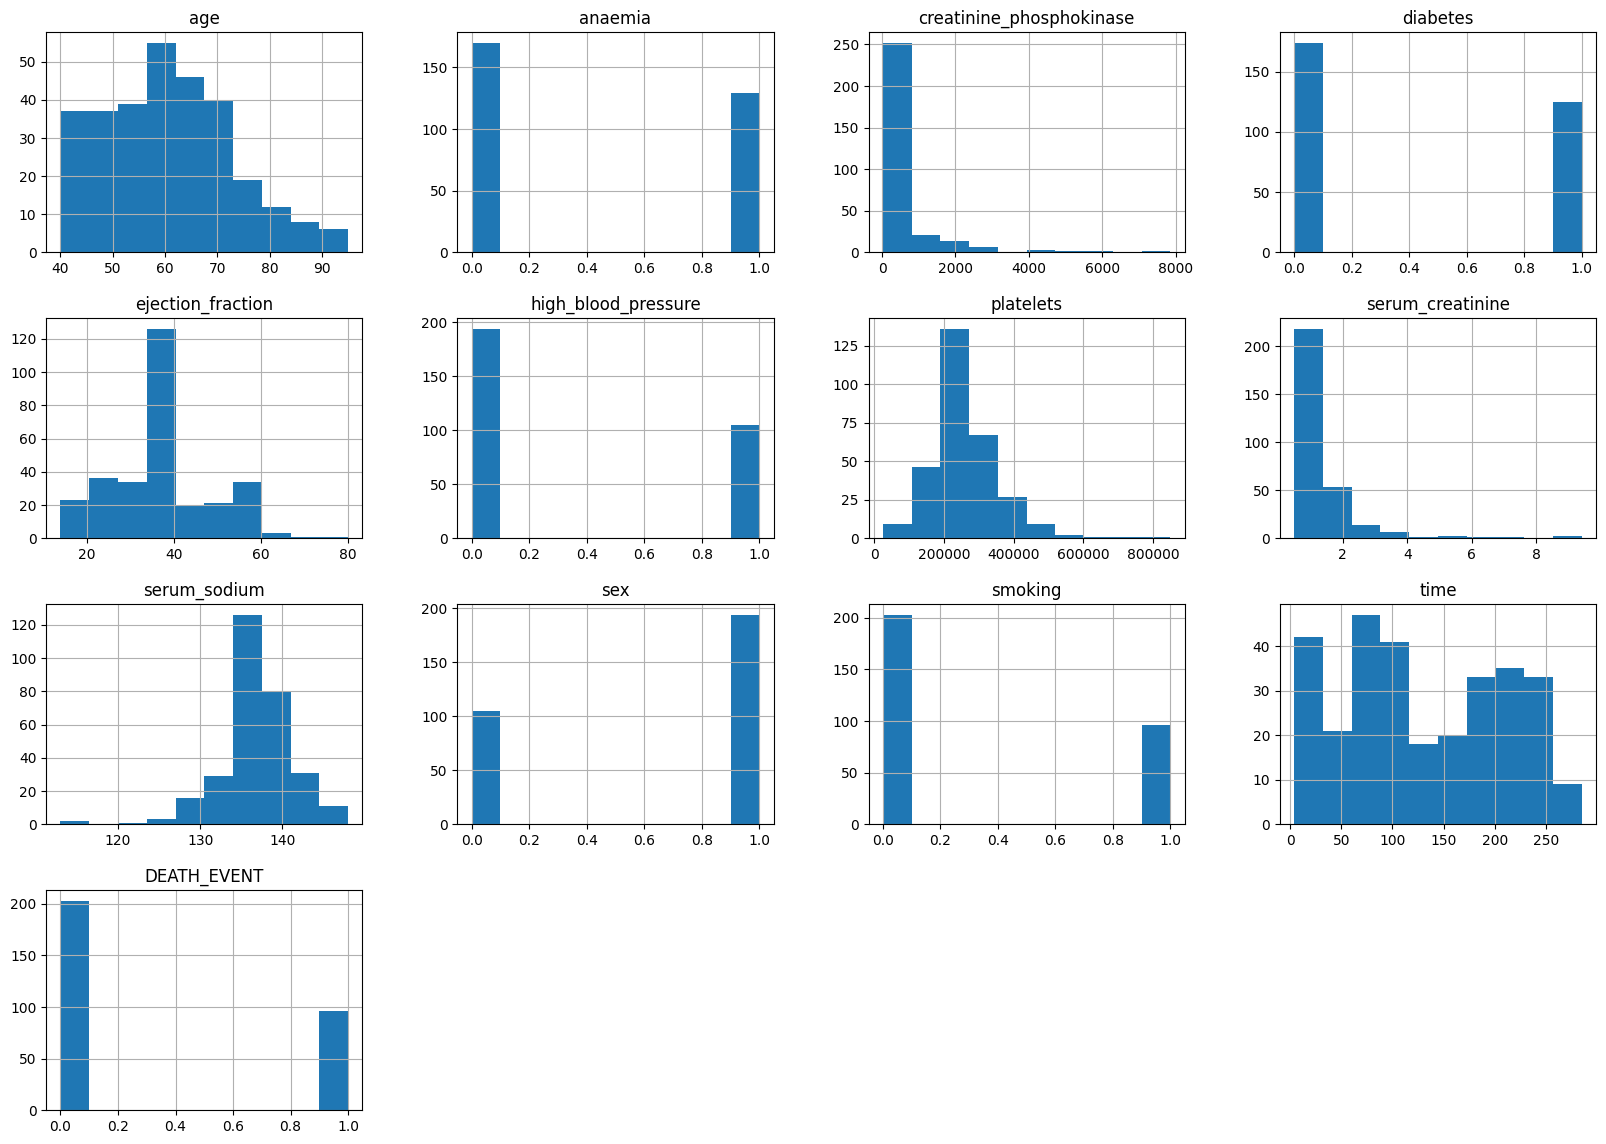

In [ ]:
_ = df.hist(figsize=(20, 14))

Other Categorical Variables : Smoking , Diabetes , Anaemia 

From the heat map , some variables shows some correlation to death_event

1. Age 
2. ejection fraction
serum creatinine
serum sodium

No significant relationship between diabetes and Death Event

In [ ]:
#anaemia
df['anaemia'].value_counts()

0    170
1    129
Name: anaemia, dtype: int64

<Axes: xlabel='anaemia'>

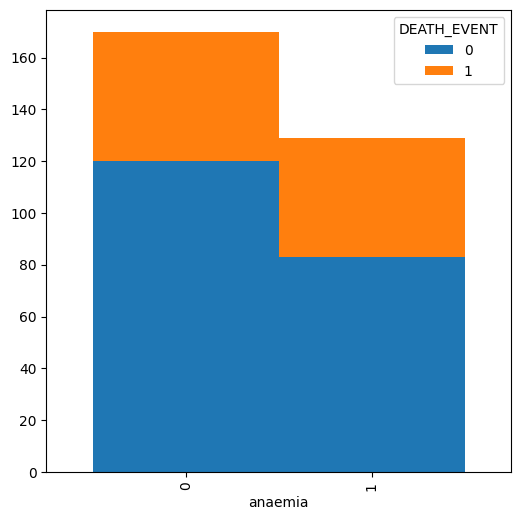

In [ ]:
stacked_bar_chart('anaemia')

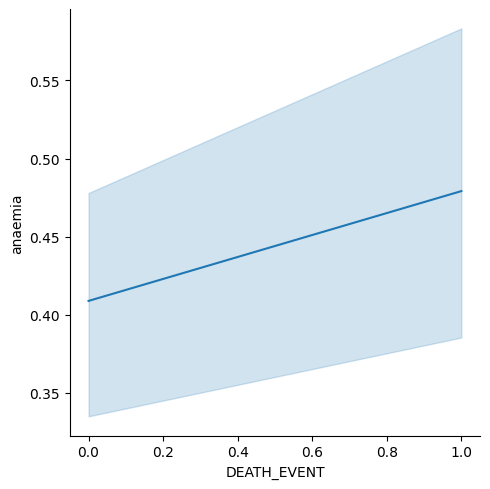

In [ ]:
sns.relplot(data=df, x="DEATH_EVENT", y="anaemia", kind="line")

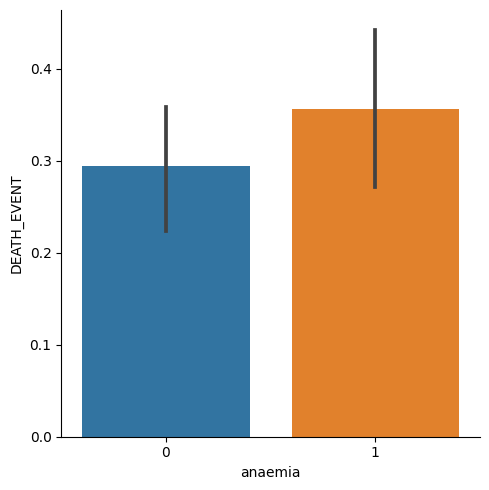

In [ ]:
sns.catplot(data=df, x="anaemia", y="DEATH_EVENT", kind="bar")

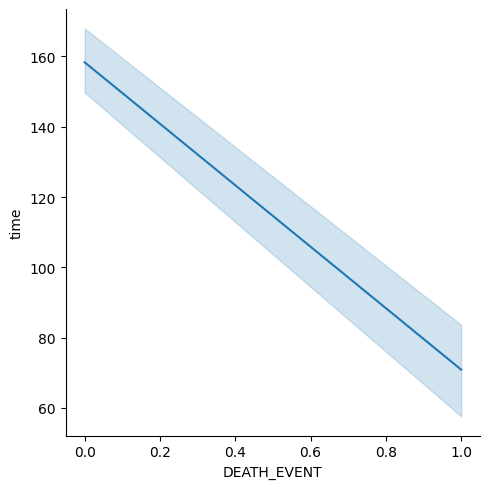

In [ ]:
sns.relplot(data=df, x="DEATH_EVENT", y="time", kind="line")


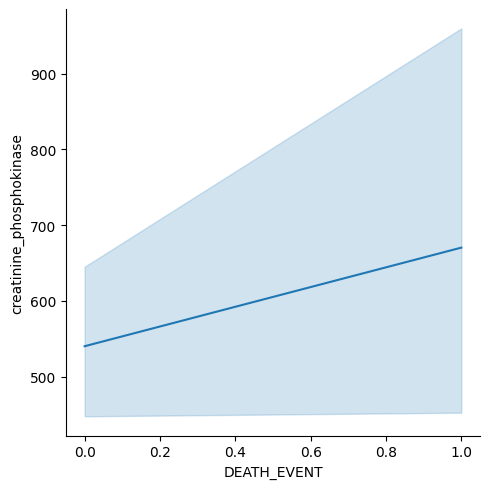

In [ ]:
sns.relplot(data=df, x="DEATH_EVENT", y="creatinine_phosphokinase", kind="line")

<Axes: xlabel='time'>

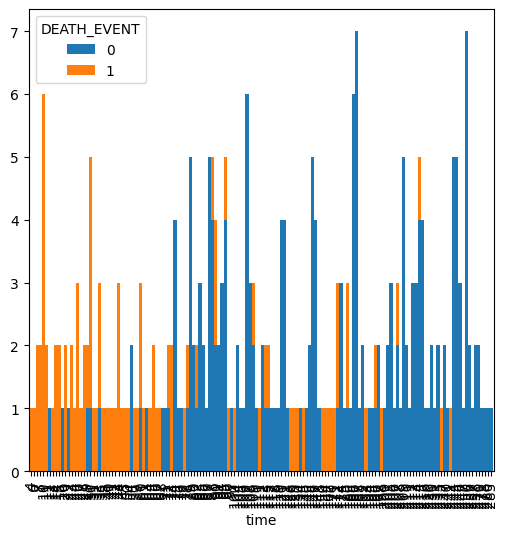

In [ ]:
stacked_bar_chart('time')

<Axes: xlabel='creatinine_phosphokinase'>

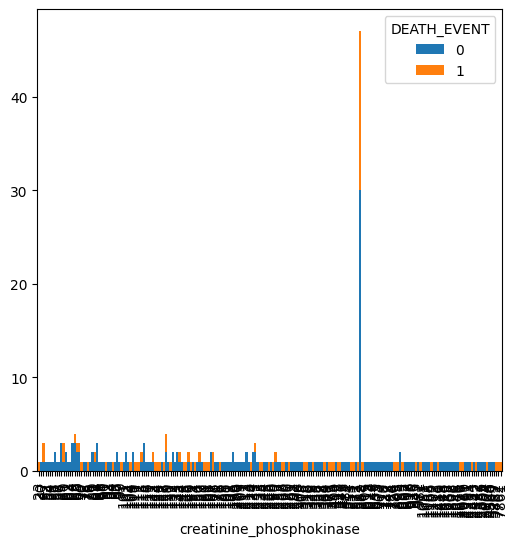

In [ ]:
stacked_bar_chart('creatinine_phosphokinase')

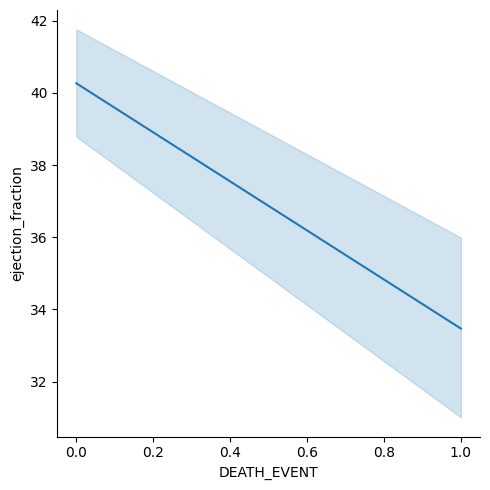

In [ ]:
sns.relplot(data=df, x="DEATH_EVENT", y="ejection_fraction", kind="line")

In [ ]:
from scipy.stats import pearsonr
pearsonr(df['DEATH_EVENT'], df['age'])


PearsonRResult(statistic=0.2537285430880036, pvalue=8.916762946532939e-06)